In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [2]:
def numerical_range_basic(A: np.matrix, N: int = 100) -> tuple[list[float], list[float]]:
    Wx = []
    Wy = []
    for k in range(N):
        phi = 2 * k * np.pi / (N - 1)
        A_ = (np.exp(-1j * phi) * A + np.exp(1j * phi) * A.H) / 2
        _, Z = LA.eigh(A_)
        Z = Z[:, -1]  # eigenvector associated with the largest eigenvalue
        z_k = Z.H @ A @ Z  # matrix 1x1
        z_k = z_k[0, 0]
        Wx.append(z_k.real)
        Wy.append(z_k.imag)
    return Wx, Wy


def numerical_range(A: np.matrix, N: int = 100) -> list[tuple[float]]:
    W = []
    for k in range(N):
        phi = 2 * np.pi * k / (N - 1)
        A_phi = np.exp(-1j * phi) * A
        A_H = (A_phi + A_phi.H) / 2
        A_I = (A_phi - A_phi.H) / 2
        _, X = LA.eigh(A_H)
        _, Y = LA.eigh(1j*A_I)
        x_max = X[:, -1]
        x_min = X[:, 0]
        y_max = Y[:, -1]
        y_min = Y[:, 0]
        w = (x_max.H @ A @ x_max)[0, 0]
        W.append([w.real, w.imag])
        w = (x_min.H @ A @ x_min)[0, 0]
        W.append([w.real, w.imag])
        w = (y_max.H @ A @ y_max)[0, 0]
        W.append([w.real, w.imag])
        w = (y_min.H @ A @ y_min)[0, 0]
        W.append([w.real, w.imag])
    return W

In [3]:
def show_numerical_range_basic(A: np.matrix, N: int = 1000):
    eigvalues, _ = np.linalg.eig(A)
    x_eig = [eigvalues[k].real for k in range(len(eigvalues))]
    y_eig = [eigvalues[k].imag for k in range(len(eigvalues))]
    x, y = numerical_range_basic(A, N=N)

    fig, ax = plt.subplots(1, 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.axis("equal")
    
    ax.plot(x_eig, y_eig, "ro", label="Eigenvalues")
    ax.plot(x, y, "b-*", label="Numerical range")
    plt.xlabel("$\Re$", loc="right")
    plt.ylabel("$\Im$", loc="top")
    ax.legend(loc="best")

def show_numerical_range(A: np.matrix, N: int = 1000):
    fig, ax = plt.subplots(1, 1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position(("data", 0))
    ax.spines["left"].set_position(("data", 0))
    ax.axhline(y=0, color="k", linewidth=0.5)
    ax.axvline(x=0, color="k", linewidth=0.5)
    ax.axis("equal")
    
    eigvalues, _ = np.linalg.eig(A)
    x_eig = [eigvalues[k].real for k in range(len(eigvalues))]
    y_eig = [eigvalues[k].imag for k in range(len(eigvalues))]
    ax.plot(x_eig, y_eig, "ro", label="Eigenvalues")
    
    W = numerical_range(A, N=N)
    try:
        polygon = ConvexHull(W)
        W = np.array(W)
        ax.fill(W[polygon.vertices, 0], W[polygon.vertices, 1], label="Numerical range")
    except:
        x, y = zip(*W)
        ax.plot(x, y, "b-*", label="Numerical range")
    
    plt.xlabel("$\Re$", loc="right")
    plt.ylabel("$\Im$", loc="top")
    ax.legend(loc="upper right")

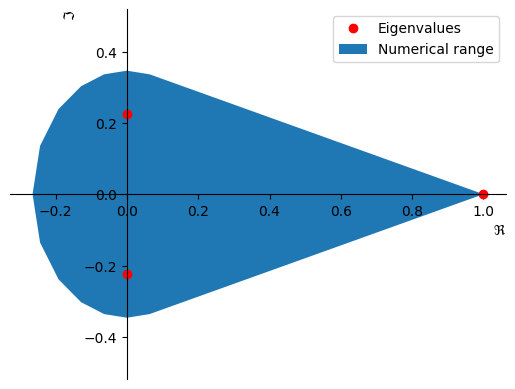

In [4]:
A = np.matrix([
    [0.3, 0.4, 0.3],
    [0, 0.5, 0.5], 
    [0.7, 0.1, 0.2]
])
show_numerical_range(A, N=6)

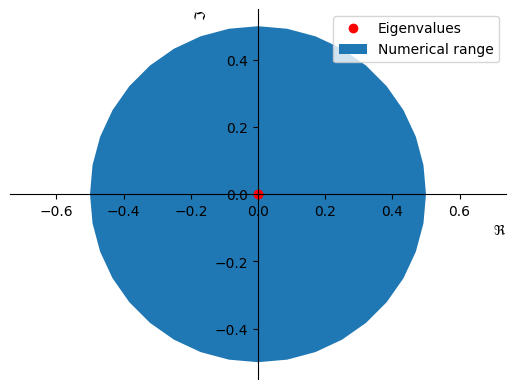

In [5]:
A = np.matrix([
    [0, 1], 
    [0, 0], 
])
show_numerical_range(A, N=10)

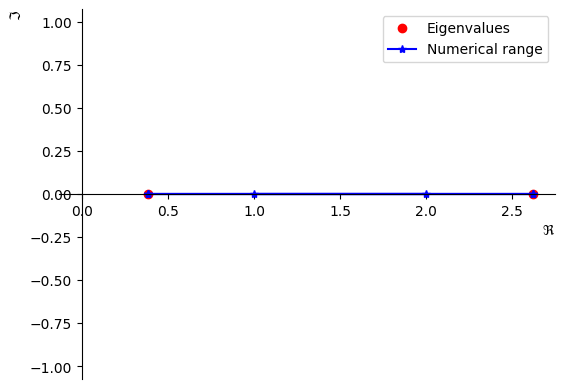

In [6]:
A = np.matrix([
    [1, 1j], 
    [-1j, 2], 
])
show_numerical_range(A, N=2)

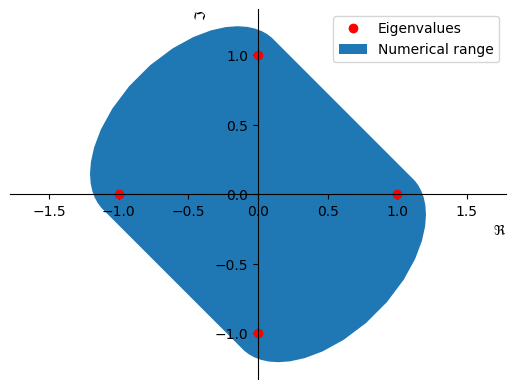

In [7]:
A = np.matrix([
    [1, 0, 0, 1],
    [0, 1j, 1, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1j],
])
show_numerical_range(A, N=12)

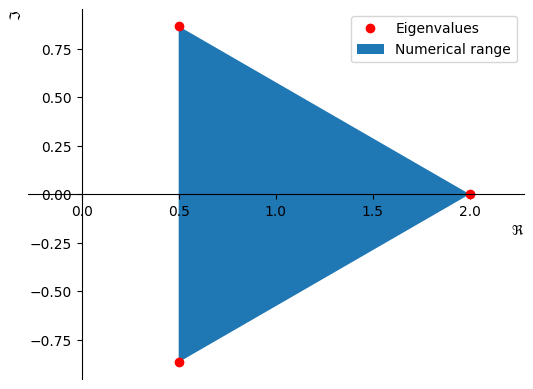

In [8]:
A = np.matrix([
    [1, 1, 0],
    [0, 1, 1], 
    [1, 0, 1]
])
show_numerical_range(A, N=2)